<a href="https://colab.research.google.com/github/sakshivohra/Breast-Cancer-Prediction-Model/blob/main/CancerPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("/content/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [5]:
data = data.rename(columns = {"diagnosis":"target"})
data.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Variable Description

Data Shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area

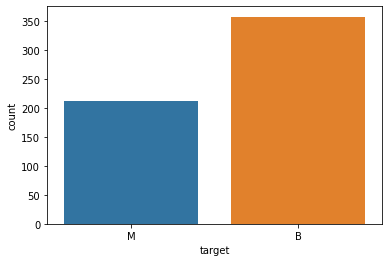

In [6]:
print("Data Shape:", data.shape) 
data.info() 
sns.countplot(data["target"])
print(data.target.value_counts()) 


Data Analysis

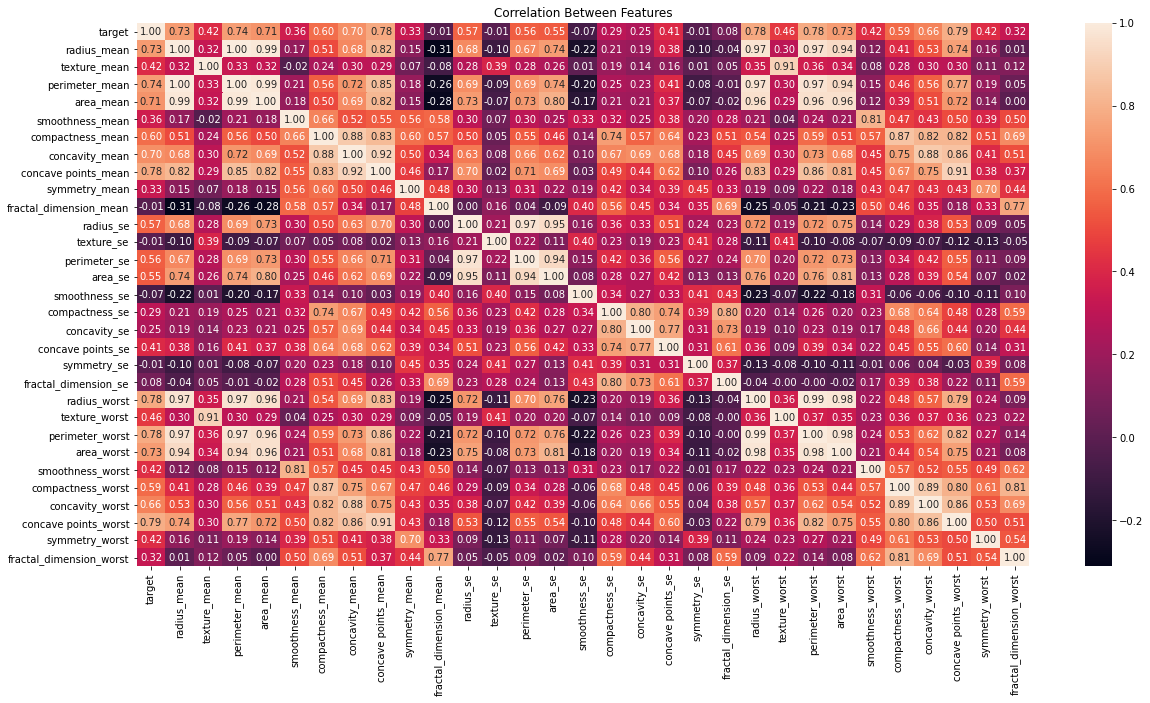

In [13]:
corr_matrix = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

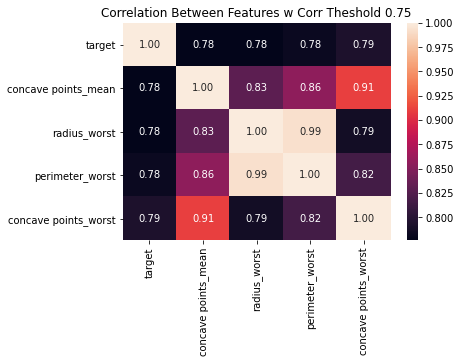

In [14]:
threshold = 0.75 
filtre = np.abs(corr_matrix["target"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

In [15]:
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

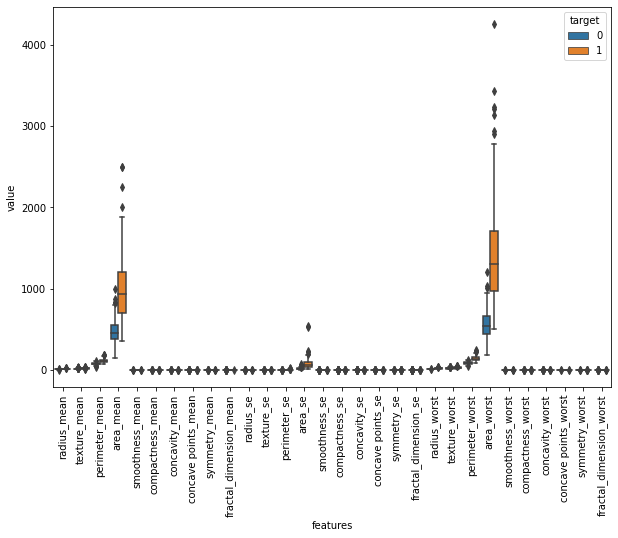

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90) 
plt.show()

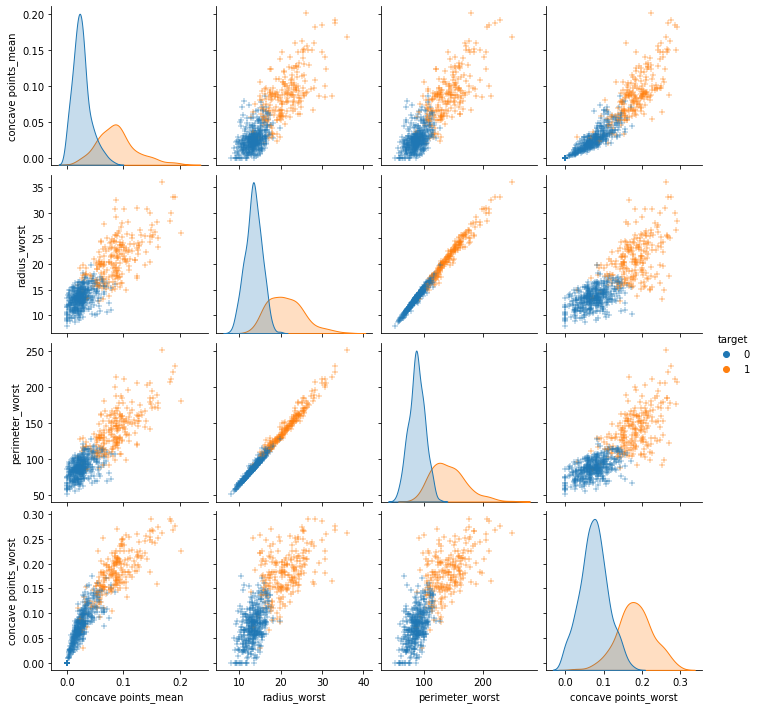

In [17]:
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

In [18]:
y = data.target
x = data.drop(["target"], axis = 1)

In [19]:
columns = x.columns.tolist()

Outlier Deteciton

In [20]:
from sklearn.neighbors import LocalOutlierFactor

In [21]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

In [22]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

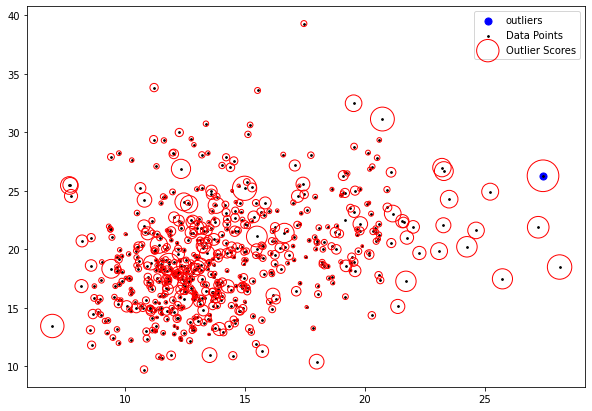

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue", s = 50, label = "outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k", s = 3, label = "Data Points")
radius = (X_score.max()- X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend() 
plt.show()

In [24]:
#drop outlier
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

Modeling

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA

Train - Test Split

In [26]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))

X_train 397
X_test 171
Y_train 397
Y_test 171


Standrization

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,1.789780e-17,-2.863648e-16,-7.243017e-17,-2.245615e-16,-2.852462e-17,-2.645519e-16,2.544844e-17,8.585352e-17,-1.639187e-15,6.331347e-16,-2.256801e-16,-2.679077e-16,1.594023e-16,5.509167e-17,-5.621028e-17,5.760855e-17,-1.703088e-16,-7.522670e-17,-1.851304e-16,1.479365e-16,1.166154e-16,-4.810034e-16,-4.438096e-16,-9.620069e-17,6.988532e-16,-1.185729e-16,7.187086e-17,-7.243017e-17,-6.739641e-17,6.236265e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,-1.087167e+00,-1.594208e+00,-1.076887e+00,-7.786835e-01,-1.400632e+00,-1.264283e+00,-1.053454e+00,-1.910582e+00,-1.517866e+00,-1.036680e+00,-1.554165e+00,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,-6.238305e-01,-7.008680e-01,-6.076433e-01,-5.188333e-01,-6.296877e-01,-6.806452e-01,-5.438890e-01,-6.470712e-01,-6.604475e-01,-5.475440e-01,-6.821946e-01,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,-2.821900e-01,-1.886966e-01,-2.787104e-01,-3.466753e-01,-2.082721e-01,-2.690774e-01,-2.138530e-01,-1.341452e-01,-2.255425e-01,-2.392287e-01,-2.715302e-01,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,2.935375e-01,4.860540e-01,2.594032e-01,1.399420e-01,3.380665e-01,3.285568e-01,2.849132e-01,4.243920e-01,3.101924e-01,2.279157e-01,4.880926e-01,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,9.189961e+00,4.583425e+00,9.830837e+00,1.170270e+01,7.693190e+00,6.131052e+00,1.230997e+01,6.537894e+00,4.990888e+00,9.364540e+00,3.590418e+00,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00


In [29]:
X_train_df["target"] = Y_train
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

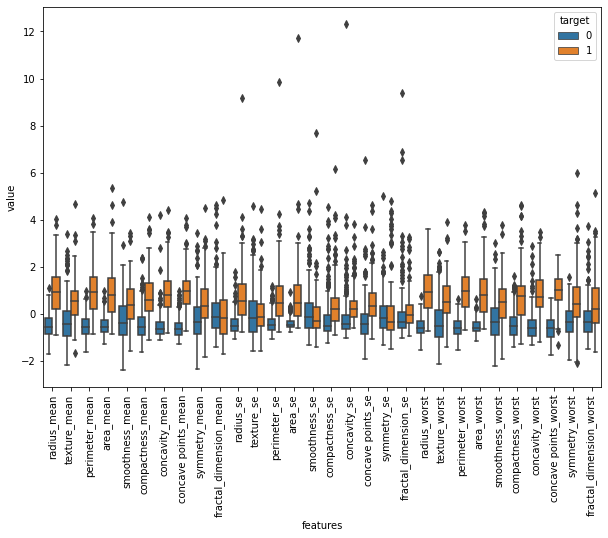

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

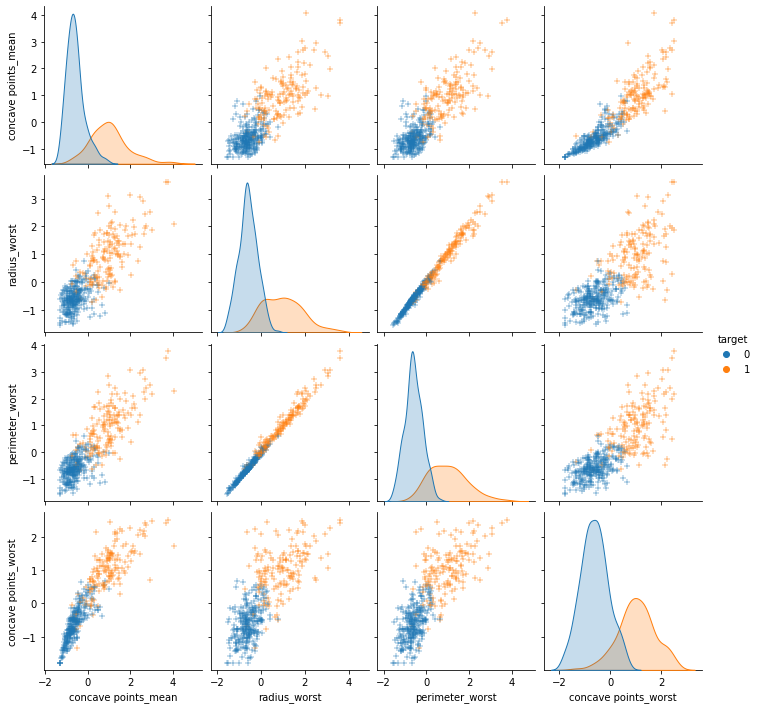

In [31]:
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

Simple K-Nearest Neighbors Classifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)

print("Basic KNN Accuracy: % {}".format(acc))
print("Score : ", score)
print("CM : ", cm)

Basic KNN Accuracy: % 0.9532163742690059
Score :  0.9532163742690059
CM :  [[108   1]
 [  7  55]]


KNN Best Parameters

In [33]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
     
    knn = KNeighborsClassifier()
    
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score : {} with paremeters : {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) # best paremetre olarak gelen değerlerimiz.
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test) 
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid


In [34]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test) 


Best training score : 0.9670512820512821 with paremeters : {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


Principal Component Analysis (PCA)

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
#reduce 30 featurs to 2 
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y

Text(0.5, 1.0, 'PCA : p1 vs p2')

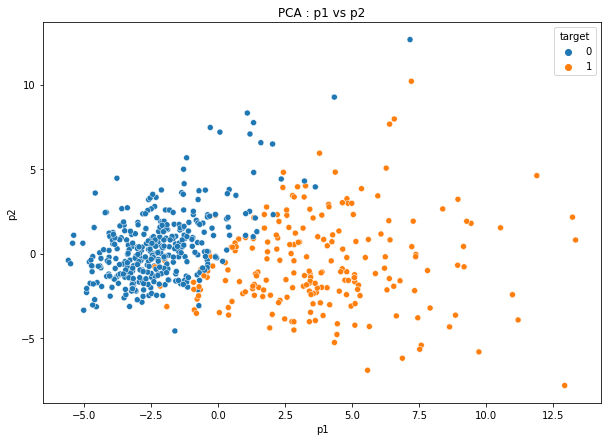

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA : p1 vs p2")

In [38]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

In [39]:
#We send our data by calling the function we wrote.
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score : 0.9419230769230769 with paremeters : {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


In [40]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

In [41]:
h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [42]:
Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

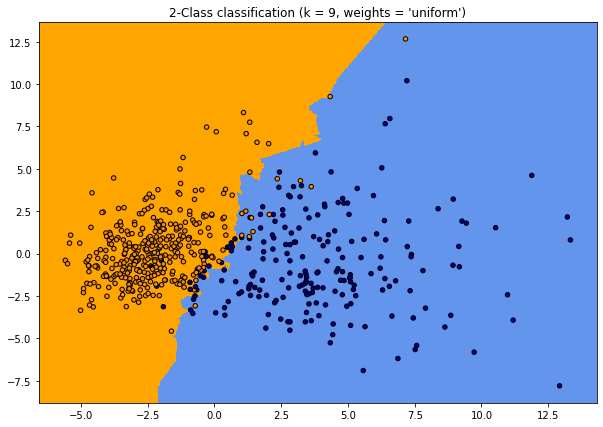

In [43]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

Neighborhood Component Analysis (NCA)

Text(0.5, 1.0, 'NCA: p1 vs p2')

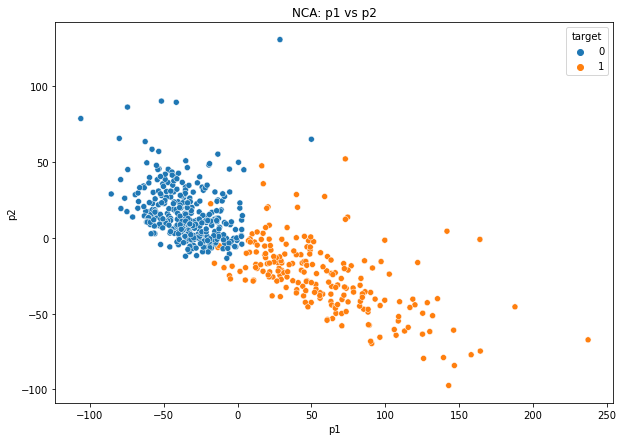

In [45]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
plt.figure(figsize=(10,7))
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

In [46]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

In [47]:
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score : 0.9873076923076922 with paremeters : {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


In [48]:
h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [49]:
Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

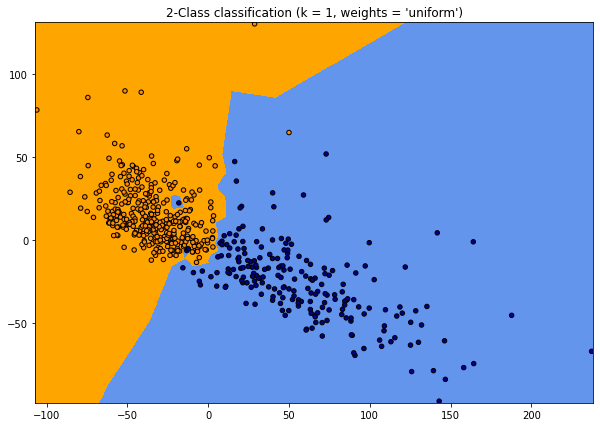

In [50]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))


Result

In [51]:
# let's find the wrong classifications we made.
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
print("Score --> {}".format(knn.score(X_test_nca,Y_test_nca)))

Score --> 0.9941520467836257


In [52]:
test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

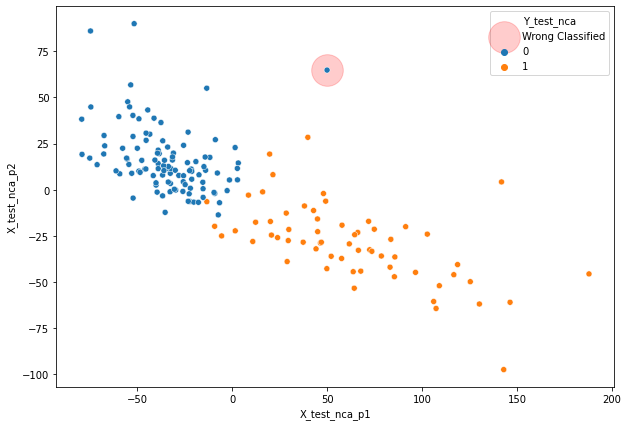

In [53]:
plt.figure(figsize=(10,7))
diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)

sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)